In [66]:
import random
import numpy as np
import matplotlib.pyplot as plt

class MossAgent:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def replicate(self, grid):
        # Check for adjacent empty cells
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                if dx == 0 and dy == 0:
                    continue
                nx = self.x + dx
                ny = self.y + dy
                if nx < 0 or nx >= len(grid) or ny < 0 or ny >= len(grid[0]):
                    continue
                if grid[nx][ny] is None:
                    # Spawn new moss agent
                    new_moss = MossAgent(nx, ny)
                    grid[nx][ny] = new_moss
    
class Environment:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = [[None for j in range(height)] for i in range(width)]
        # Spawn a single moss point randomly
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)
        self.grid[x][y] = MossAgent(x, y)
    
    def step(self):
        # Create a list of moss agents to replicate to avoid modifying the grid in-place during iteration
        agents_to_replicate = []
        for i in range(self.width):
            for j in range(self.height):
                agent = self.grid[i][j]
                if agent is not None:
                    agents_to_replicate.append(agent)
        
        # Loop through all moss agents in the list and replicate onto adjacent empty cells
        for agent in agents_to_replicate:
            agent.replicate(self.grid)
    
    def visualize(self):
        fig, ax = plt.subplots()
        plt.axis('off')
        for i in range(20):  # simulate 20 steps
            # Create a NumPy array to store the visualization data
            data = np.zeros((self.width, self.height))
            for i in range(self.width):
                for j in range(self.height):
                    if self.grid[i][j] is not None:
                        data[i][j] = 1
            
            # Clear the previous plot and plot the new data using Matplotlib
            ax.clear()
            ax.imshow(data, cmap='Greens', interpolation='nearest')
            plt.pause(0.1)
            self.step()
        
        plt.show()



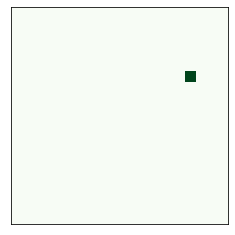

In [65]:
env = Environment(20, 20)
env.visualize()
